Đọc dữ liệu từ: D:/Year 4/tiến hóa/project/UWSN_greedy/output_path/output_GA
  → GA: 5 file kết quả hợp lệ.
Đọc dữ liệu từ: D:/Year 4/tiến hóa/project/UWSN_greedy/output_path/output_greedy
  → greedy: 1 file kết quả hợp lệ.
Đọc dữ liệu từ: D:/Year 4/tiến hóa/project/UWSN_greedy/output_path/output_PSO
  → PSO: 5 file kết quả hợp lệ.


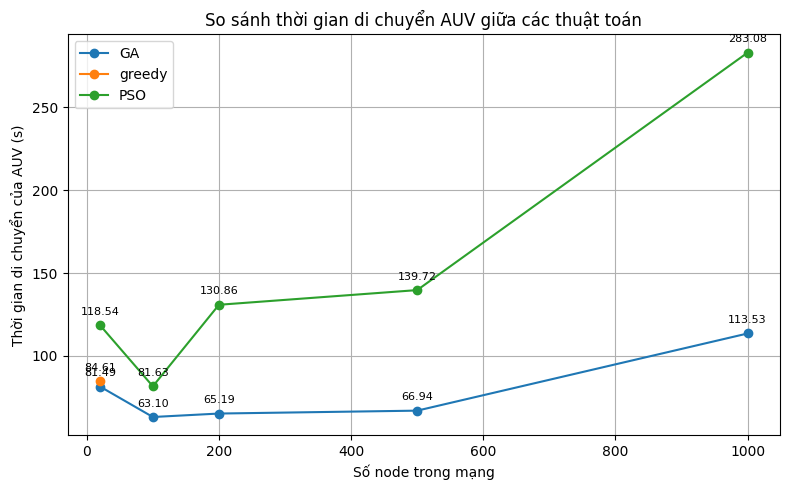

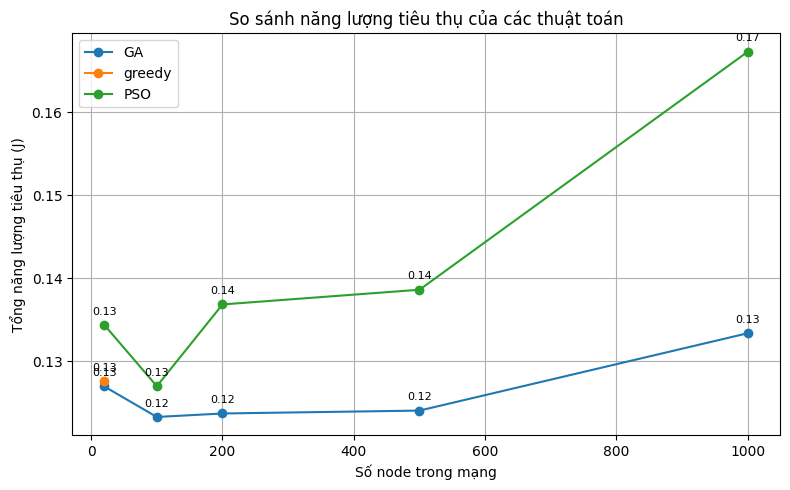

In [3]:
import os
import json
import re
import matplotlib.pyplot as plt

# =============================
# HÀM ĐỌC KẾT QUẢ TỪ THƯ MỤC
# =============================
def load_results_from_folder(folder_path, algo_name):
    results = []
    for file in os.listdir(folder_path):
        if file.endswith("_result.json"):
            match = re.search(r"(\d+)", file)  # lấy số node từ tên file
            if not match:
                continue
            num_nodes = int(match.group(1))
            with open(os.path.join(folder_path, file), "r") as f:
                data = json.load(f)

            # --- Đọc dữ liệu từ file JSON ---
            best_time = data.get("best_time", None)
            E_member = data["energy"]["Member"]["E_total"]
            E_target = data["energy"]["Target"]["E_total"]
            total_energy = E_member + E_target

            results.append((num_nodes, best_time, total_energy))

    # sắp xếp theo số node tăng dần
    results.sort(key=lambda x: x[0])

    return {
        "algo": algo_name,
        "nodes": [r[0] for r in results],
        "times": [r[1] for r in results],
        "energies": [r[2] for r in results],
    }


# =============================
# CÁC HÀM VẼ BIỂU ĐỒ
# =============================
def plot_travel_time(all_results, save_dir=None):
    plt.figure(figsize=(8, 5))
    for res in all_results:
        x = res["nodes"]
        y = res["times"]
        plt.plot(x, y, marker="o", label=res["algo"])
        # annotate each point with its y-value
        for xi, yi in zip(x, y):
            if yi is None:
                continue
            plt.annotate(f"{yi:.2f}", xy=(xi, yi), xytext=(0, 6),
                         textcoords="offset points", ha="center", va="bottom",
                         fontsize=8)
    plt.xlabel("Số node trong mạng")
    plt.ylabel("Thời gian di chuyển của AUV (s)")
    plt.title("So sánh thời gian di chuyển AUV giữa các thuật toán")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    if save_dir:
        plt.savefig(os.path.join(save_dir, "compare_travel_time.png"))
    plt.show()


def plot_total_energy(all_results, save_dir=None):
    plt.figure(figsize=(8, 5))
    for res in all_results:
        x = res["nodes"]
        y = res["energies"]
        plt.plot(x, y, marker="o", label=res["algo"])
        # annotate each point with its y-value
        for xi, yi in zip(x, y):
            if yi is None:
                continue
            plt.annotate(f"{yi:.2f}", xy=(xi, yi), xytext=(0, 6),
                         textcoords="offset points", ha="center", va="bottom",
                         fontsize=8)
    plt.xlabel("Số node trong mạng")
    plt.ylabel("Tổng năng lượng tiêu thụ (J)")
    plt.title("So sánh năng lượng tiêu thụ của các thuật toán")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    if save_dir:
        plt.savefig(os.path.join(save_dir, "compare_total_energy.png"))
    plt.show()

if __name__ == "__main__":
    base_dir = "D:/Year 4/tiến hóa/project/UWSN_greedy/output_path/"
    output_folders = [f for f in os.listdir(base_dir)
                      if os.path.isdir(os.path.join(base_dir, f)) and f.startswith("output_")]

    all_results = []
    for folder in output_folders:
        algo_name = folder.replace("output_", "")
        folder_path = os.path.join(base_dir, folder)
        print(f"Đọc dữ liệu từ: {folder_path}")
        res = load_results_from_folder(folder_path, algo_name)
        if len(res["nodes"]) > 0:
            all_results.append(res)
            print(f"  → {algo_name}: {len(res['nodes'])} file kết quả hợp lệ.")
        else:
            print(f"Không tìm thấy file hợp lệ trong {folder_path}")

    if all_results:
        plot_travel_time(all_results, save_dir=base_dir)
        plot_total_energy(all_results, save_dir=base_dir)
        
    else:
        print("Không có dữ liệu")


PHÂN TÍCH SO SÁNH GA vs PSO

1. Đang load dữ liệu...
   ✓ Đã load GA: D:\Year 4\tiến hóa\project\data\ga_result_nodes_150.json
   ✓ Đã load PSO: D:\Year 4\tiến hóa\project\data\pso_result_nodes_150.json

2. Đang trích xuất dữ liệu...
   ✓ GA: 413 chu kỳ
   ✓ PSO: 84 chu kỳ

THỐNG KÊ SO SÁNH GA vs PSO

Chỉ số                                   GA              PSO            
----------------------------------------------------------------------
Tổng số chu kỳ:                          413             84             
Node còn sống cuối cùng:                 124             103            
Tỷ lệ sống sót (%):                      82.67           68.67          
Thời gian chu kỳ TB (s):                 1869.13         11426.33       
Thời gian chu kỳ MIN (s):                598.10          4176.23        
Thời gian chu kỳ MAX (s):                2497.06         12970.18       
Độ lệch chuẩn thời gian (s):             194.39          1189.37        
Số cụm trung bình:                       1

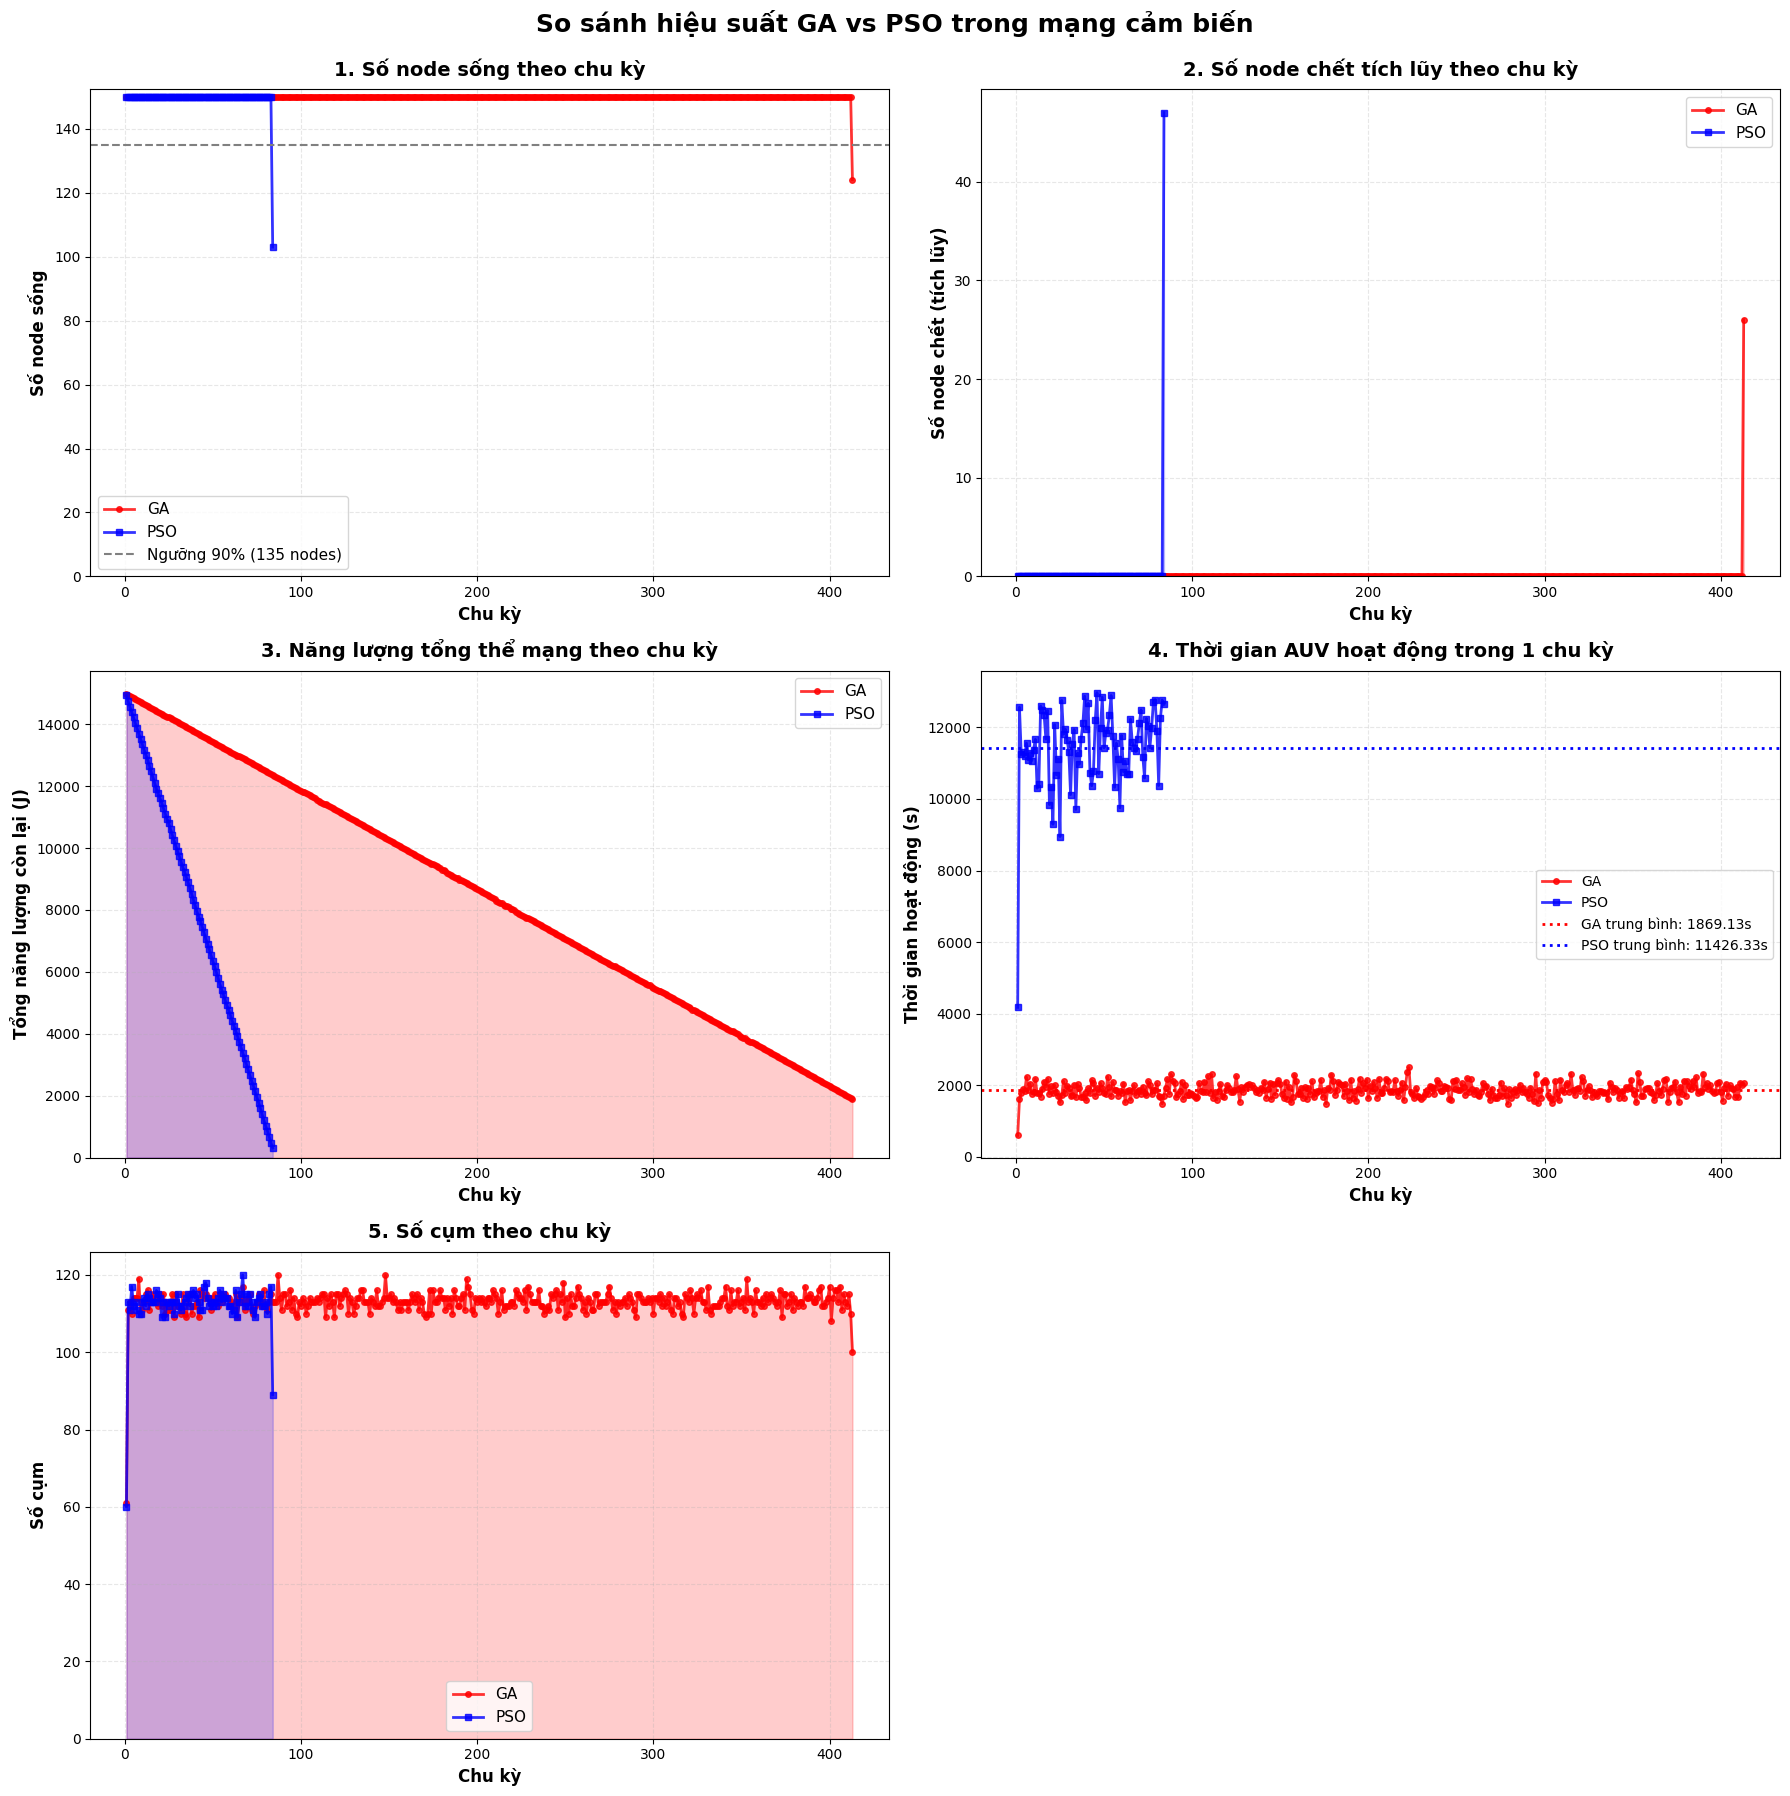


✓ HOÀN THÀNH!



In [ ]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os

def load_result_json(filepath):
    """Load kết quả từ file JSON"""
    with open(filepath, 'r', encoding='utf-8') as f:
        data = json.load(f)
    return data

def extract_data(data):
    """Trích xuất dữ liệu từ JSON"""
    outputs = data.get('outputs', [])
    
    cycles = [o['cycle'] for o in outputs]
    alive_nodes = [o['alive_nodes'] for o in outputs]
    dead_nodes_cumulative = [data['initial_total_nodes'] - a for a in alive_nodes]
    total_energy = [o['total_energy_remaining'] for o in outputs]
    cycle_times = [o['best_time'] for o in outputs]
    num_clusters = [o['num_clusters'] for o in outputs]
    
    return {
        'cycles': cycles,
        'alive_nodes': alive_nodes,
        'dead_nodes_cumulative': dead_nodes_cumulative,
        'total_energy': total_energy,
        'cycle_times': cycle_times,
        'num_clusters': num_clusters,
        'total_nodes': data['initial_total_nodes'],
        'algorithm': data.get('algorithm', 'Unknown')
    }

def plot_comparison(ga_data, pso_data, output_dir='./comparison_plots'):
    """Vẽ 5 biểu đồ so sánh GA vs PSO"""
    
    os.makedirs(output_dir, exist_ok=True)
    
    # Tạo figure với 5 subplots
    fig, axes = plt.subplots(3, 2, figsize=(18, 18))
    fig.suptitle('So sánh hiệu suất GA vs PSO trong mạng cảm biến', 
                 fontsize=18, fontweight='bold', y=0.995)
    
    # Ẩn subplot thứ 6 (không dùng)
    axes[2, 1].axis('off')
    
    # ==========================================
    # 1. SỐ NODE SỐNG THEO CHU KỲ
    # ==========================================
    ax1 = axes[0, 0]
    ax1.plot(ga_data['cycles'], ga_data['alive_nodes'], 
             'r-o', linewidth=2, markersize=4, label='GA', alpha=0.8)
    ax1.plot(pso_data['cycles'], pso_data['alive_nodes'], 
             'b-s', linewidth=2, markersize=4, label='PSO', alpha=0.8)
    
    # Vẽ ngưỡng 90%
    threshold = ga_data['total_nodes'] * 0.9
    ax1.axhline(y=threshold, color='gray', linestyle='--', linewidth=1.5,
                label=f'Ngưỡng 90% ({int(threshold)} nodes)')
    
    ax1.set_xlabel('Chu kỳ', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Số node sống', fontsize=12, fontweight='bold')
    ax1.set_title('1. Số node sống theo chu kỳ', fontsize=14, fontweight='bold', pad=10)
    ax1.grid(True, alpha=0.3, linestyle='--')
    ax1.legend(loc='best', fontsize=11)
    ax1.set_ylim(bottom=0)
    
    # ==========================================
    # 2. SỐ NODE CHẾT TÍCH LŨY THEO CHU KỲ
    # ==========================================
    ax2 = axes[0, 1]
    ax2.plot(ga_data['cycles'], ga_data['dead_nodes_cumulative'], 
             'r-o', linewidth=2, markersize=4, label='GA', alpha=0.8)
    ax2.plot(pso_data['cycles'], pso_data['dead_nodes_cumulative'], 
             'b-s', linewidth=2, markersize=4, label='PSO', alpha=0.8)
    
    # Fill area
    ax2.fill_between(ga_data['cycles'], 0, ga_data['dead_nodes_cumulative'], 
                     alpha=0.2, color='red')
    ax2.fill_between(pso_data['cycles'], 0, pso_data['dead_nodes_cumulative'], 
                     alpha=0.2, color='blue')
    
    ax2.set_xlabel('Chu kỳ', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Số node chết (tích lũy)', fontsize=12, fontweight='bold')
    ax2.set_title('2. Số node chết tích lũy theo chu kỳ', fontsize=14, fontweight='bold', pad=10)
    ax2.grid(True, alpha=0.3, linestyle='--')
    ax2.legend(loc='best', fontsize=11)
    ax2.set_ylim(bottom=0)
    
    # ==========================================
    # 3. NĂNG LƯỢNG TỔNG THỂ MẠNG THEO CHU KỲ
    # ==========================================
    ax3 = axes[1, 0]
    ax3.plot(ga_data['cycles'], ga_data['total_energy'], 
             'r-o', linewidth=2, markersize=4, label='GA', alpha=0.8)
    ax3.plot(pso_data['cycles'], pso_data['total_energy'], 
             'b-s', linewidth=2, markersize=4, label='PSO', alpha=0.8)
    
    # Fill area
    ax3.fill_between(ga_data['cycles'], 0, ga_data['total_energy'], 
                     alpha=0.2, color='red')
    ax3.fill_between(pso_data['cycles'], 0, pso_data['total_energy'], 
                     alpha=0.2, color='blue')
    
    ax3.set_xlabel('Chu kỳ', fontsize=12, fontweight='bold')
    ax3.set_ylabel('Tổng năng lượng còn lại (J)', fontsize=12, fontweight='bold')
    ax3.set_title('3. Năng lượng tổng thể mạng theo chu kỳ', fontsize=14, fontweight='bold', pad=10)
    ax3.grid(True, alpha=0.3, linestyle='--')
    ax3.legend(loc='best', fontsize=11)
    ax3.set_ylim(bottom=0)
    
    # ==========================================
    # 4. THỜI GIAN AUV HOẠT ĐỘNG TRONG 1 CHU KỲ
    # ==========================================
    ax4 = axes[1, 1]
    ax4.plot(ga_data['cycles'], ga_data['cycle_times'], 
             'r-o', linewidth=2, markersize=4, label='GA', alpha=0.8)
    ax4.plot(pso_data['cycles'], pso_data['cycle_times'], 
             'b-s', linewidth=2, markersize=4, label='PSO', alpha=0.8)
    
    # Vẽ đường trung bình
    ga_avg = np.mean(ga_data['cycle_times'])
    pso_avg = np.mean(pso_data['cycle_times'])
    ax4.axhline(y=ga_avg, color='red', linestyle=':', linewidth=2,
                label=f'GA trung bình: {ga_avg:.2f}s')
    ax4.axhline(y=pso_avg, color='blue', linestyle=':', linewidth=2,
                label=f'PSO trung bình: {pso_avg:.2f}s')
    
    ax4.set_xlabel('Chu kỳ', fontsize=12, fontweight='bold')
    ax4.set_ylabel('Thời gian hoạt động (s)', fontsize=12, fontweight='bold')
    ax4.set_title('4. Thời gian AUV hoạt động trong 1 chu kỳ', fontsize=14, fontweight='bold', pad=10)
    ax4.grid(True, alpha=0.3, linestyle='--')
    ax4.legend(loc='best', fontsize=10)
    
    # ==========================================
    # 5. SỐ CỤM THEO CHU KỲ
    # ==========================================
    ax5 = axes[2, 0]
    ax5.plot(ga_data['cycles'], ga_data['num_clusters'], 
             'r-o', linewidth=2, markersize=4, label='GA', alpha=0.8)
    ax5.plot(pso_data['cycles'], pso_data['num_clusters'], 
             'b-s', linewidth=2, markersize=4, label='PSO', alpha=0.8)
    
    # Fill area
    ax5.fill_between(ga_data['cycles'], 0, ga_data['num_clusters'], 
                     alpha=0.2, color='red')
    ax5.fill_between(pso_data['cycles'], 0, pso_data['num_clusters'], 
                     alpha=0.2, color='blue')
    
    ax5.set_xlabel('Chu kỳ', fontsize=12, fontweight='bold')
    ax5.set_ylabel('Số cụm', fontsize=12, fontweight='bold')
    ax5.set_title('5. Số cụm theo chu kỳ', fontsize=14, fontweight='bold', pad=10)
    ax5.grid(True, alpha=0.3, linestyle='--')
    ax5.legend(loc='best', fontsize=11)
    ax5.set_ylim(bottom=0)
    
    plt.tight_layout()
    
    # Lưu file
    output_file = os.path.join(output_dir, 'ga_vs_pso_comparison.png')
    plt.savefig(output_file, dpi=300, bbox_inches='tight')
    print(f"Đã lưu biểu đồ so sánh: {output_file}")
    
    plt.show()
    
    return output_file

def print_statistics(ga_data, pso_data):
    """In thống kê so sánh"""
    print("\n" + "="*70)
    print("THỐNG KÊ SO SÁNH GA vs PSO")
    print("="*70)
    
    print(f"\n{'Chỉ số':<40} {'GA':<15} {'PSO':<15}")
    print("-"*70)
    
    # Số chu kỳ
    print(f"{'Tổng số chu kỳ:':<40} {len(ga_data['cycles']):<15} {len(pso_data['cycles']):<15}")
    
    # Node cuối cùng
    ga_final = ga_data['alive_nodes'][-1]
    pso_final = pso_data['alive_nodes'][-1]
    print(f"{'Node còn sống cuối cùng:':<40} {ga_final:<15} {pso_final:<15}")
    
    # Tỷ lệ sống sót
    ga_survival = (ga_final / ga_data['total_nodes']) * 100
    pso_survival = (pso_final / pso_data['total_nodes']) * 100
    print(f"{'Tỷ lệ sống sót (%):':<40} {ga_survival:<15.2f} {pso_survival:<15.2f}")
    
    # Thời gian chu kỳ trung bình
    ga_avg_time = np.mean(ga_data['cycle_times'])
    pso_avg_time = np.mean(pso_data['cycle_times'])
    print(f"{'Thời gian chu kỳ TB (s):':<40} {ga_avg_time:<15.2f} {pso_avg_time:<15.2f}")
    
    # Thời gian chu kỳ min/max
    ga_min = np.min(ga_data['cycle_times'])
    ga_max = np.max(ga_data['cycle_times'])
    pso_min = np.min(pso_data['cycle_times'])
    pso_max = np.max(pso_data['cycle_times'])
    print(f"{'Thời gian chu kỳ MIN (s):':<40} {ga_min:<15.2f} {pso_min:<15.2f}")
    print(f"{'Thời gian chu kỳ MAX (s):':<40} {ga_max:<15.2f} {pso_max:<15.2f}")
    
    # Độ lệch chuẩn
    ga_std = np.std(ga_data['cycle_times'])
    pso_std = np.std(pso_data['cycle_times'])
    print(f"{'Độ lệch chuẩn thời gian (s):':<40} {ga_std:<15.2f} {pso_std:<15.2f}")
    
    # Số cụm trung bình
    ga_avg_clusters = np.mean(ga_data['num_clusters'])
    pso_avg_clusters = np.mean(pso_data['num_clusters'])
    print(f"{'Số cụm trung bình:':<40} {ga_avg_clusters:<15.2f} {pso_avg_clusters:<15.2f}")
    
    # Năng lượng cuối cùng
    ga_final_energy = ga_data['total_energy'][-1]
    pso_final_energy = pso_data['total_energy'][-1]
    print(f"{'Năng lượng còn lại cuối (J):':<40} {ga_final_energy:<15.2f} {pso_final_energy:<15.2f}")
    
    print("="*70)
    
    # So sánh hiệu suất
    print("\nKẾT LUẬN:")
    if pso_avg_time < ga_avg_time:
        improvement = ((ga_avg_time - pso_avg_time) / ga_avg_time) * 100
        print(f"PSO nhanh hơn GA {improvement:.2f}% về thời gian chu kỳ trung bình")
    else:
        worse = ((pso_avg_time - ga_avg_time) / ga_avg_time) * 100
        print(f"PSO chậm hơn GA {worse:.2f}% về thời gian chu kỳ trung bình")
    
    if pso_survival > ga_survival:
        print(f"PSO có tỷ lệ sống sót cao hơn GA ({pso_survival:.2f}% vs {ga_survival:.2f}%)")
    elif pso_survival < ga_survival:
        print(f"PSO có tỷ lệ sống sót thấp hơn GA ({pso_survival:.2f}% vs {ga_survival:.2f}%)")
    else:
        print(f"= Cả hai có tỷ lệ sống sót bằng nhau ({pso_survival:.2f}%)")
    
    print("="*70 + "\n")

def main():
    """Hàm chính"""
    # ===== CẤU HÌNH =====
    # Thay đổi đường dẫn file ở đây
    GA_RESULT_FILE = "D:\Year 4\\tiến hóa\project\data\ga_result_nodes_150.json"
    PSO_RESULT_FILE = "D:\Year 4\\tiến hóa\project\data\pso_result_nodes_150.json"
    OUTPUT_DIR = "D:\Year 4\\tiến hóa\project\data"
    
    print("="*70)
    print("PHÂN TÍCH SO SÁNH GA vs PSO")
    print("="*70)
    
    # Load dữ liệu
    print("\nĐang load dữ liệu...")
    try:
        ga_json = load_result_json(GA_RESULT_FILE)
        print(f"Đã load GA: {GA_RESULT_FILE}")
    except Exception as e:
        print(f"Lỗi load GA: {e}")
        return
    
    try:
        pso_json = load_result_json(PSO_RESULT_FILE)
        print(f"Đã load PSO: {PSO_RESULT_FILE}")
    except Exception as e:
        print(f"Lỗi load PSO: {e}")
        return
    
    # Trích xuất dữ liệu
    print("\nĐang trích xuất dữ liệu...")
    ga_data = extract_data(ga_json)
    pso_data = extract_data(pso_json)
    print(f"GA: {len(ga_data['cycles'])} chu kỳ")
    print(f"PSO: {len(pso_data['cycles'])} chu kỳ")
    
    # In thống kê
    print_statistics(ga_data, pso_data)
    
    # Vẽ biểu đồ
    print("Đang vẽ biểu đồ so sánh...")
    plot_comparison(ga_data, pso_data, OUTPUT_DIR)
    
    print("\nHOÀN THÀNH!\n")

if __name__ == '__main__':
    main()